In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [2]:

nlines=11
rainbow=cmap=plt.get_cmap('rainbow')
line_colors = cmap(np.linspace(0,1,nlines))
greys=plt.get_cmap('Greys')
line_colors2=greys(np.linspace(0,1,nlines))
greens=plt.get_cmap('Greens')
line_colors3=greens(np.linspace(0,1,nlines))
oranges=plt.get_cmap('Oranges')
line_colors4=oranges(np.linspace(0,1,nlines))
blues=plt.get_cmap('Blues')
line_colors5=blues(np.linspace(0,1,nlines))

## Parameters

__DEATH__

$d = \frac{1}{\text{life expectancy in days}} $

Human : life expectancy $\approx$ 45 years

Mosquito : 20 days 
female mosquito life expectancy 42-56 days 

__BIRTH__

$\nu = \text{births per person per day}$

Human : in Mali 43.219 births per 1000 people per year

$43.219/(1000*365) \approx 1.2x10^{-4}$

Mosquito : keep constant population of mosquitos 

i.e. $\nu = d * N_M $


$N_M$ is number of mosquitos



 43.219 births per 1000 people per year
10.667 deaths per 1000 people per year 

731,000 deaths due to malaria and 216,000,000 cases so probability of death 0.003
protection from death for AS 91% 

In [3]:
def SEIS_death(INP,t):  

    Y=np.zeros((9))
    V = INP   
    #susceptible hosts
    Y[0] = nu[0]*(V[0]+V[3]+V[6])*(K-((V[0]+V[3]+V[6])))/K - V[0] * r * (beta[0][1]*V[8]) - d[0] * V[0] + gamma[0] *V[6]
    #susceptible hosts w mutation
    Y[1] = nu[0]*(V[1]+V[4]+V[7])*(K-((V[1]+V[4]+V[7])))/K  - V[1] * r * (beta[0][1]*V[8]) - d[0] * V[1] +gamma[2] *V[7]
    
    #susceptible mosquitos
    Y[2] = nu[1] - (V[2] * r * (beta[1][0]*V[6]) + V[2] * r * (beta[1][1]*V[7]) ) - d[1] * V[2]
    
    #exposed hosts
    
    Y[3]= V[0] * r * (beta[0][1]*V[8]) -sigma[0]*V[3]- d[0]*V[3]
    
    #exposed hosts w mutation
    
    Y[4] = V[1] * r * (beta[0][1]*V[8]) -sigma[0]*V[4]- d[0]*V[4]
    
    #exposed mosquitos
    
    Y[5]=V[2] * r * (beta[1][0]*V[6]) + V[2] * r * (beta[1][1]*V[7]) -sigma[1]*V[5]- d[1]*V[5]
    
    #infected hosts
    Y[6] = sigma[0]*V[3] - gamma[0] * V[6] - d[0] * V[6]     -mu[0]*V[6]
    
    #infected hosts w mutation
    Y[7] = sigma[0]*V[4] - gamma[2] * V[7] - d[0] * V[7]    -mu[1]*V[7]
    
    #infected mosquitos
    Y[8] = sigma[1]*V[5] - d[1] * V[8]
    
#     #recovered hosts
#     Y[9]=gamma[0] * V[6] - 0.5*V[9] -d[0]*V[9]
    
#     #recovered hosts with mutation
#     Y[10]=gamma[2] * V[7] -0.5*V[10] -d[0]*V[10]
    
    return Y

In [4]:
mut_recovery=np.linspace(0.0165,0.033,5)
RES_E=np.zeros((10001,9,5))
K=2e3
r=0.5/1e3;
mutants=100
N=900
beta=np.array([[0, 0.2], [0.5, 0.5]]);
sigma=np.array([0.143,0.143])
d=np.array([6e-5, 0.05]);
nu=np.array([1.2e-4, 5e2]);
X0=np.array([1e3-mutants,mutants, 1e4]);
Y0=np.array([0,0,0,1,0, 1]);
ND=MaxTime=1000.0;
mu=np.array([3e-6,2.7e-7])
TS=1.0

INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants,mutants, 1e3]);
    Y0=np.array([0,0,0,1,0, 1]);
    ND=MaxTime=10000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
    gamma=np.array([0.033, 0,mut_recovery[i]]);
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_death,INPUT,t_range)
    RES_E[:,:,i]=RES_mut

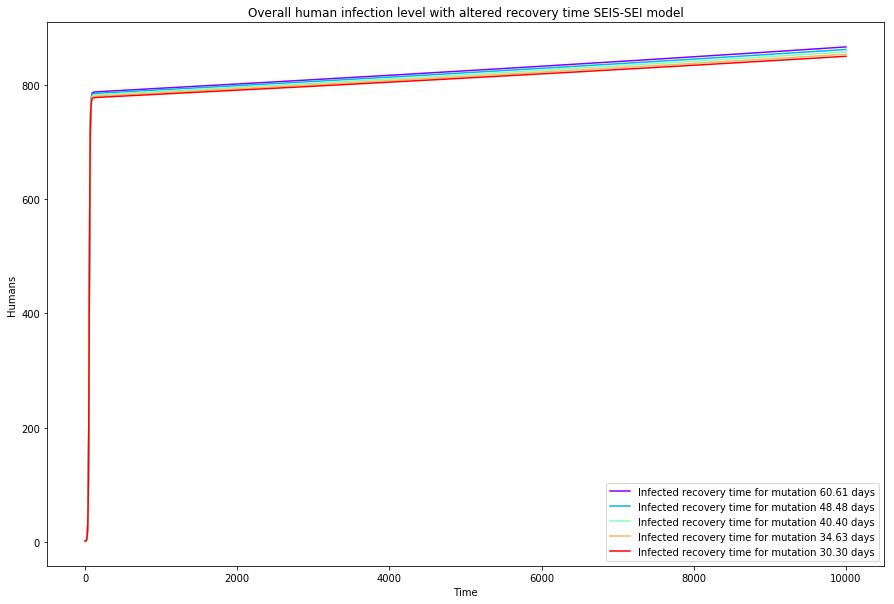

In [5]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_E[:,6,i]+RES_E[:,7,i], c=line_colors[i], label='Infected recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))
    #plt.plot(RES_E[:,0,i]+RES_E[:,1,i], c=line_colors[5+i], label='Susceptible recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()


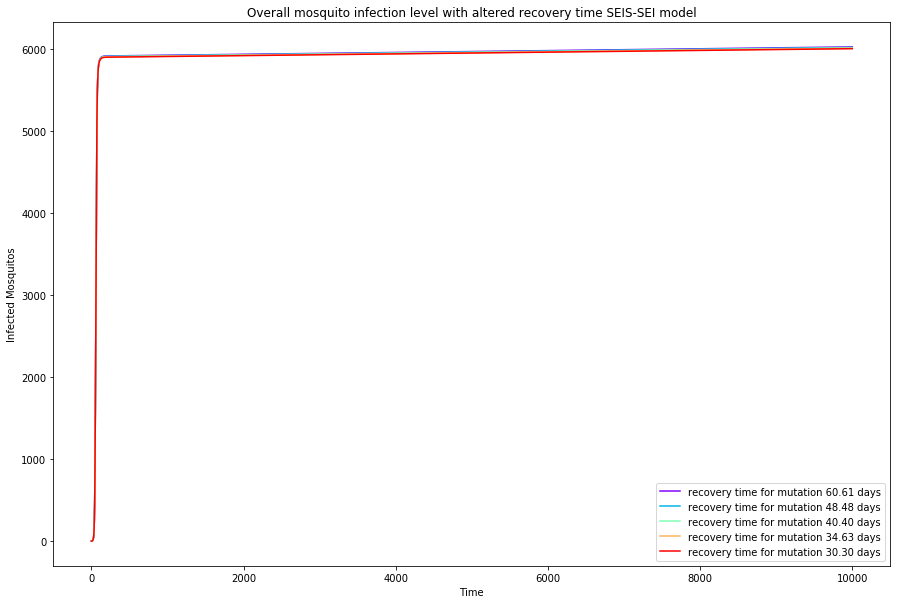

In [6]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_E[:,8,i], c=line_colors[i], label='recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Infected Mosquitos')
plt.title('Overall mosquito infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

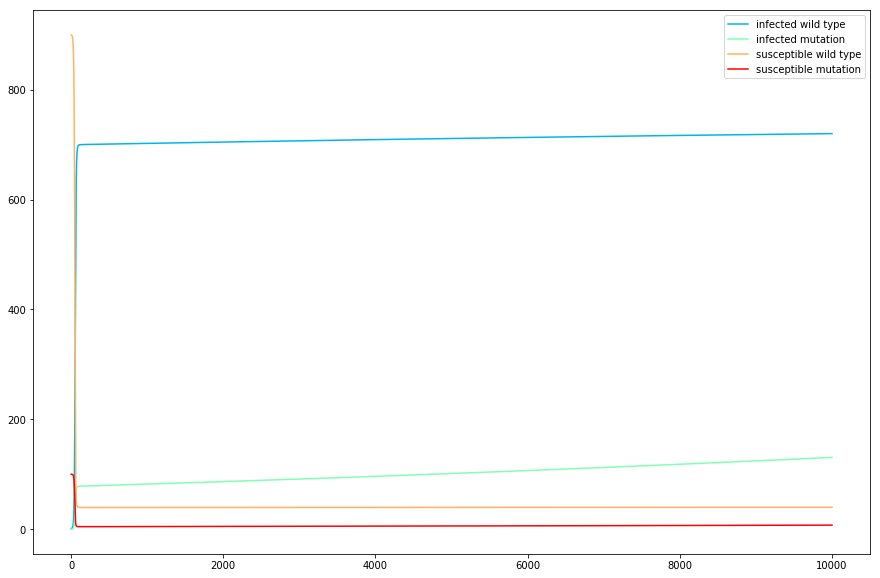

In [7]:
plt.figure(figsize=(15,10))
plt.plot(RES_E[:,6,4], c=line_colors[1],label='infected wild type')
plt.plot(RES_E[:,7,4], c=line_colors[2],label='infected mutation')
plt.plot(RES_E[:,0,4], c=line_colors[3],label='susceptible wild type')
plt.plot(RES_E[:,1,4], c=line_colors[4],label='susceptible mutation')
plt.legend()
plt.show()

In [8]:
(RES_E[-1,6,4]+RES_E[-1,3,4]+RES_E[-1,0,4]-RES_E[0,6,4]+RES_E[0,3,4]+RES_E[0,0,4])/100000

0.018254727014303678

In [9]:
NW=np.zeros(100001)
NC=np.zeros(100001)
for i in range(100001):
    NW[i]=RES_E[i,6,4]+RES_E[i,3,4]+RES_E[i,0,4]
    NC[i]=RES_E[i,7,4]+RES_E[i,4,4]+RES_E[i,1,4]

IndexError: index 10001 is out of bounds for axis 0 with size 10001

/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


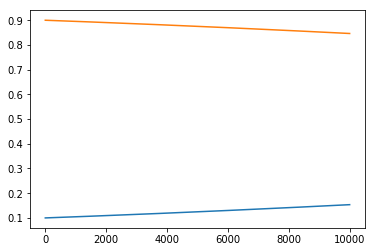

In [10]:
plt.plot(NC/(NC+NW))
plt.plot(NW/(NC+NW))
plt.show()

In [255]:
(RES_E[-1,7,4]+RES_E[-1,4,4]+RES_E[-1,1,4]-RES_E[0,7,4]+RES_E[0,4,4]+RES_E[0,1,4])/100000

96.653966682458034

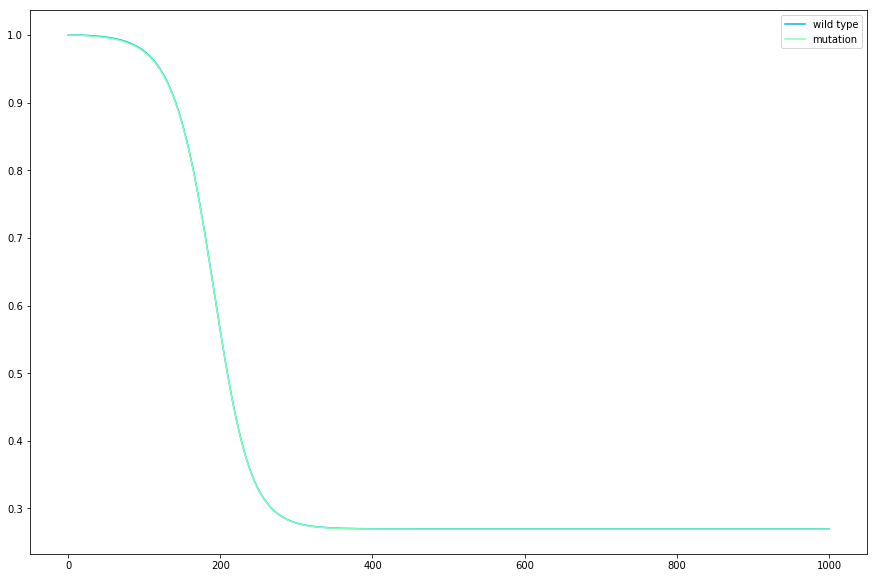

In [202]:
plt.figure(figsize=(15,10))
plt.plot(RES_E[:,0,4]/900, c=line_colors[1],label='wild type')
plt.plot(RES_E[:,1,4]/100, c=line_colors[2],label='mutation')
plt.legend()
plt.show()

In [198]:
RES_E[:,0,4]/900

array([ 1.        ,  1.00001136,  1.00002137, ...,  0.26982237,
        0.26982236,  0.26982236])

# R0
$R_0=\frac{ma^2bc}{r\mu _2 }e^{-\mu _2 \tau _m}e^{-\mu _1 \tau _h}$

$\mu_1$ per capita rate of human mortality (1/years)
1/45 $\approx$ 0.02
$\mu_2$
Per capita rate of mosquito mortality (1/days)


In [4]:
((10*0.5*0.5*0.5*0.02)/(0.033*(10/365)))*np.exp(-(10/365)*7)*np.exp(-0.02*20)

15.300717184020108

In [17]:
1/40

0.025

In [3]:
0.5*0.5*0.2*0.5*10/(0.05*(0.033+6e-5))

151.24016938898973

## Changing initial level of mutation

In [380]:
m=np.linspace(100,500,5)
RES_m=np.zeros((100001,9,5))

r=0.5/1e3;

beta=np.array([[0, 0.2], [0.5, 0.5]]);
sigma=np.array([0.05,0.143])
d=np.array([6e-5, 0.05]);
nu=np.array([1.2e-4, 5e2]);
gamma=np.array([0.033, 0,0.033]);
mu=np.array([3e-6,2.7e-7])
K=2e3

INPUT=np.hstack((X0,Y0))
for i in range(5):
    mutants=m[i]
    N=1e3-mutants
    X0=np.array([1e3-mutants,mutants, 1e3]);
    Y0=np.array([0,0,0,1,0, 1]);
    ND=MaxTime=100000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
  
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_death,INPUT,t_range)
    RES_m[:,:,i]=RES_mut

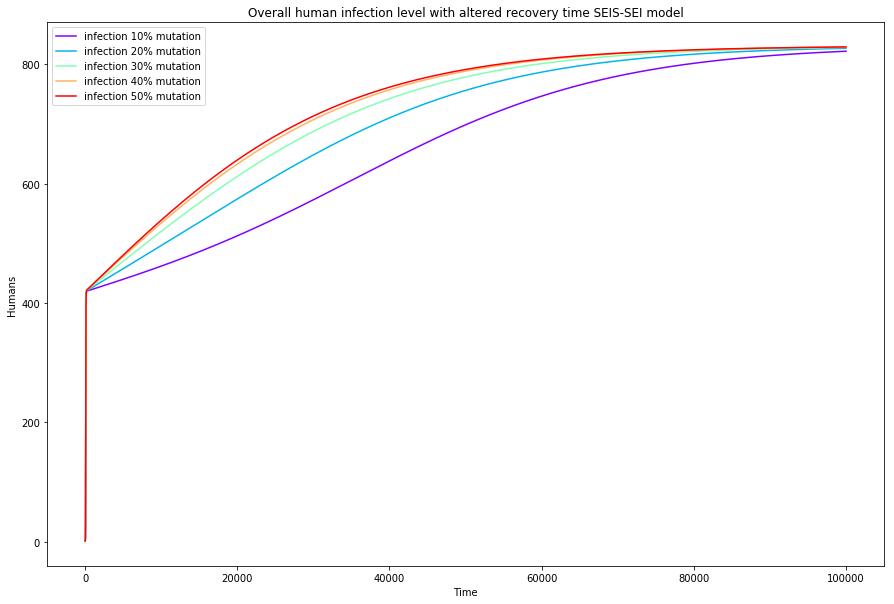

In [384]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_m[:,6,i]+RES_m[:,7,i], c=line_colors[i], label='infection {0:.0f}% mutation'.format(m[i]/10))
    #plt.plot(RES_m[:,1,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
    #plt.plot(RES_m[:,0,i]+RES_m[:,1,i]+RES_m[:,3,i]+RES_m[:,4,i]+RES_m[:,6,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
    
plt.xlabel('Time')
plt.ylabel('Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()


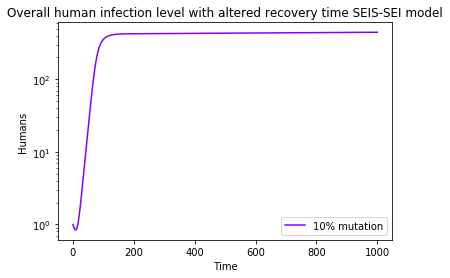

In [325]:
plt.semilogy(RES_m[:,6,0]+RES_m[:,7,0], c=line_colors[0], label='{0:.0f}% mutation'.format(m[0]/10))
    #plt.plot(RES_E[:,0,i]+RES_E[:,1,i], c=line_colors[5+i], label='Susceptible recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()


In [3]:
def SEIS_3_mut(INP,t):  

    Y=np.zeros((15))
    V = INP   
    #susceptible hosts
    N=np.zeros(3)
    for i in range(3):
        N[i]=V[i]+V[i+3]+V[i+6]+V[i+9]
    
    p=(N[1]+2*N[2])/(2*np.sum(N))
    B=np.zeros(3)
    B[0]=(1-p)**2
    B[1]=2*p*(1-p)
    B[2]=p**2
    
    #susceptible hosts AA,AC,CC
    for i in range(3):
        Y[i]=B[i]*nu[0]*(np.sum(N))*(K-np.sum(N))/K - V[i] * (r/1e3) * (beta[0][1]*V[14]) - d[0] * V[i] + delta[i]*V[i+9]
        
    #exposed hosts AA,AC,CC
    for i in range(3):
        Y[i+3]=V[i] * (r/1e3)* (beta[0][1]*V[14])-sigma[0]*V[i+3]- d[0]*V[i+3]
        
    #infectious hosts AA,AC,CC
    for i in range(3):
        Y[i+6]=sigma[0]*V[i+3] - gamma[i] * V[i+6] - d[0] * V[i+6]     -mu[i]*V[i+6]
    
    #recovered hosts AA,AC,CC
    for i in range(3):
        Y[i+9]=gamma[i] * V[i+6] - delta[i]*V[i+9] -d[0]*V[i+9]
    
    
    #Mosquitos
    Y[12]=nu[1] - (V[12] * (r/1e3) * (beta[1][0]*V[6]) + V[12] * (r/1e3) * (beta[1][1]*V[7])+ V[12] * (r/1e3)* (beta[1][1]*V[8]) ) - d[1] * V[12]
    
    Y[13]=V[12] * (r/1e3) * (beta[1][0]*V[6]) + V[12] * (r/1e3) * (beta[1][1]*V[7])+ V[12] * (r/1e3) * (beta[1][1]*V[8])-sigma[1]*V[13]- d[1]*V[13]
    
    Y[14] = sigma[1]*V[13] - d[1] * V[14]
    

    
    return Y

In [21]:
all_freq=np.linspace(0.01,0.3,5)
Num=1e3
AC=(all_freq)*(1-all_freq)*2*Num
CC=(all_freq)*(all_freq)*Num
N=1000000
RES_m=np.zeros((N+1,15,5))

r=0.5;

beta=np.array([[0.2,0.2, 0.2], [0.5,0.5, 0.5]]);
sigma=np.array([0.05,0.143])
d=np.array([6e-5, 0.05]);
nu=np.array([1.2e-4, 5e2]);
gamma=np.array([0.033, 0.0165,0.0165]);
c=3e-6

mu=np.array([c,0.83*c,0.27*c])
delta=np.array([1.0,1.0,1.0])
K=1e4

for i in range(5):
    
    het=AC[i]
    hom=CC[i]
    
    X0=np.array([1e3-het-hom,het, hom,0,0,0,1,0, 0,0,0,0]);
    Y0=np.array([1e4,0,1]);
    ND=MaxTime=1000000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
  
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_3_mut,INPUT,t_range)
    RES_m[:,:,i]=RES_mut



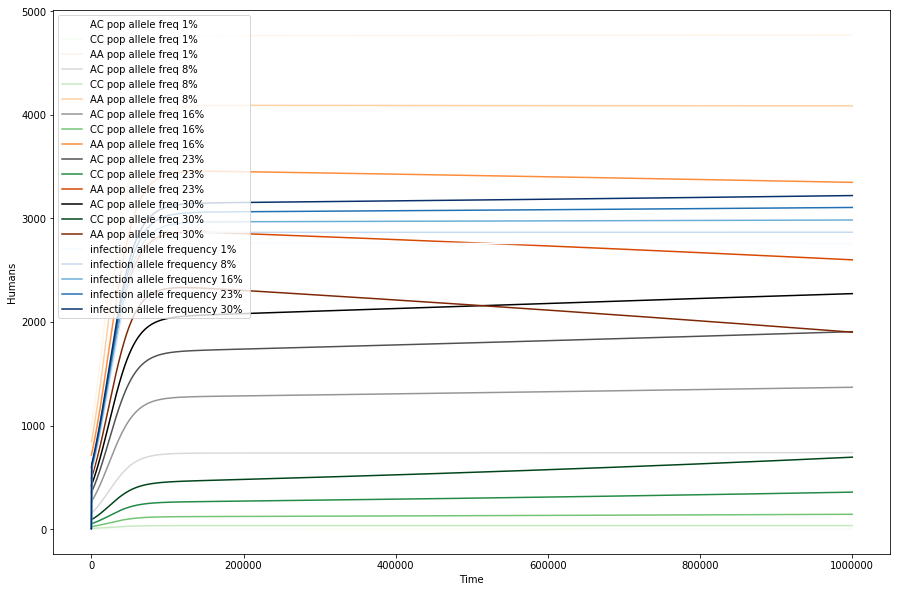

In [64]:
plt.figure(figsize=(15,10))
#for i in range(5):
   # plt.plot(RES_m[:,6,i]+RES_m[:,7,i]+RES_m[:,8,i], c=line_colors[i], label='infection allele frequency {0:.0f}% '.format(all_freq[i]*100))
    #plt.plot(RES_m[:,1,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
    #plt.plot(RES_m[:,0,i]+RES_m[:,1,i]+RES_m[:,3,i]+RES_m[:,4,i]+RES_m[:,6,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
for i in range(5):
    pop_AA=np.zeros((1000001,5))
    pop_AC=np.zeros((1000001,5))
    pop_CC=np.zeros((1000001,5))
    pop=np.zeros((1000001,5))
    pop_AA[:,i]=RES_m[:,0,i]+RES_m[:,3,i]+RES_m[:,6,i]+RES_m[:,9,i]
    pop_AC[:,i]=RES_m[:,1,i]+RES_m[:,4,i]+RES_m[:,7,i]+RES_m[:,10,i]
    pop_CC[:,i]=RES_m[:,2,i]+RES_m[:,5,i]+RES_m[:,8,i]+RES_m[:,11,i]
    pop[:,i]=pop_AA[:,i]+pop_AC[:,i]+pop_CC[:,i]

    plt.plot(pop_AC[:,i],c=line_colors2[i],label='AC pop allele freq {0:.0f}%'.format(all_freq[i]*100))  

    plt.plot(pop_CC[:,i],c=line_colors3[i],label='CC pop allele freq {0:.0f}%'.format(all_freq[i]*100)) 
    

    plt.plot(pop_AA[:,i],c=line_colors4[i],label='AA pop allele freq {0:.0f}%'.format(all_freq[i]*100))
for i in range(5):
    plt.plot((RES_m[:,6,i]+RES_m[:,7,i]+RES_m[:,8,i]), c=line_colors5[i], label='infection allele frequency {0:.0f}% '.format(all_freq[i]*100))

plt.xlabel('Time')
plt.ylabel('Humans')
#plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

In [47]:
AA=np.zeros(N+1)
AC=np.zeros(N+1)
CC=np.zeros(N+1)

AA[:]=RES_m[:,0,2]+RES_m[:,3,2]+RES_m[:,6,2]+RES_m[:,9,2]
AC[:]=RES_m[:,1,2]+RES_m[:,4,2]+RES_m[:,7,2]+RES_m[:,10,2]
CC[:]=RES_m[:,2,2]+RES_m[:,5,2]+RES_m[:,8,2]+RES_m[:,11,2]


1825

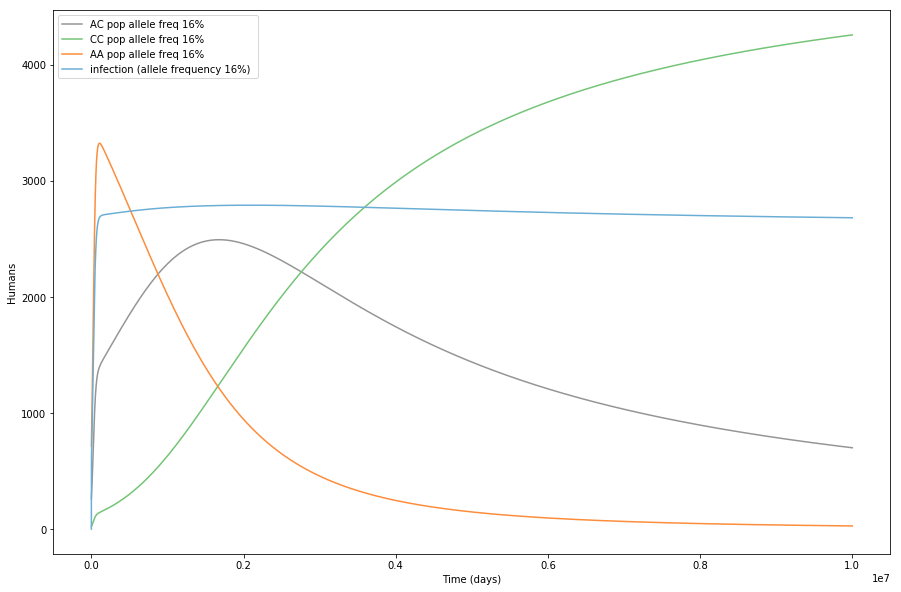

In [49]:
plt.figure(figsize=(15,10))
plt.plot(AC,c=line_colors2[2],label='AC pop allele freq {0:.0f}%'.format(all_freq[2]*100))  

plt.plot(CC,c=line_colors3[2],label='CC pop allele freq {0:.0f}%'.format(all_freq[2]*100)) 
    

plt.plot(AA,c=line_colors4[2],label='AA pop allele freq {0:.0f}%'.format(all_freq[2]*100))
plt.plot((RES_m[:,6,2]+RES_m[:,7,2]+RES_m[:,8,2]), c=line_colors5[2], label='infection (allele frequency {0:.0f}%) '.format(all_freq[2]*100))

plt.xlabel('Time (days)')
plt.ylabel('Humans')
#plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

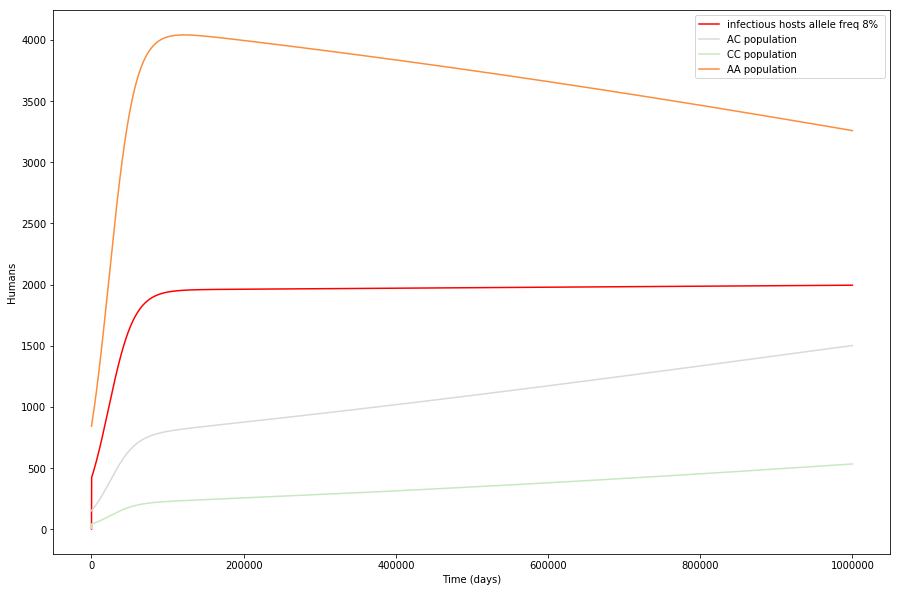

In [20]:
plt.figure(figsize=(15,10))

plt.plot(RES_m[:,6,1]+RES_m[:,7,1]+RES_m[:,8,1], c=line_colors[4], label='infectious hosts allele freq {0:.0f}% '.format(all_freq[1]*100))
pop=np.zeros(1000001)
pop[:]=RES_m[:,0,1]+RES_m[:,1,1]+RES_m[:,2,1]+RES_m[:,3,1]+RES_m[:,4,1]+RES_m[:,5,1]+RES_m[:,6,1]+RES_m[:,7,1]+RES_m[:,8,1]+RES_m[:,9,1]+RES_m[:,10,1]+RES_m[:,11,1]
#plt.plot(pop,c=line_colors[3],label='overall population')   
#plt.plot(RES_m[:,1,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
#plt.plot(RES_m[:,0,i]+RES_m[:,1,i]+RES_m[:,3,i]+RES_m[:,4,i]+RES_m[:,6,i]+RES_m[:,7,i], c=line_colors2[i], label='population with mutation{0:.0f} %'.format(m[i]/10))
pop_AC=np.zeros(1000001)
pop_AC[:]=RES_m[:,1,1]+RES_m[:,4,1]+RES_m[:,7,1]+RES_m[:,10,1]
plt.plot(pop_AC,c=line_colors2[1],label='AC population')  
pop_CC=np.zeros(1000001)
pop_CC[:]=RES_m[:,2,1]+RES_m[:,5,1]+RES_m[:,8,4]+RES_m[:,11,1]
plt.plot(pop_CC,c=line_colors3[1],label='CC population')  
pop_AA=np.zeros(1000001)
pop_AA[:]=RES_m[:,0,1]+RES_m[:,3,1]+RES_m[:,6,1]+RES_m[:,9,1]
plt.plot(pop_AA,c=line_colors4[2],label='AA population')  
plt.xlabel('Time (days)')
plt.ylabel('Humans')
#plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

In [392]:
all_freq=np.linspace(0,0.3,5)

In [393]:
m=(all_freq)*(1-all_freq)*2

In [70]:
4000*365

1460000

In [ ]:
((10*0.5*0.5*0.5*0.2)/(r*(40/365)))*np.exp(-(40/365)*7)*np.exp(-0.2*20)

In [4]:
all_freq=0.1
#=np.linspace(0.01,0.3,5)
Num=1e3
AC=(all_freq)*(1-all_freq)*2*Num
CC=(all_freq)*(all_freq)*Num
N=1460000
m_recov=1/np.linspace(1/0.033,1/0.0165,11)
RES_5=np.zeros((N+1,15,11,11))

r=0.5;

beta=np.array([[0.2,0.2, 0.2], [0.5,0.5, 0.5]]);
sigma=np.array([0.05,0.143])
d=np.array([6e-5, 0.05]);
nu=np.array([1.2e-4, 5e2]);
gamma=np.array([0.033, 0.0165,0.0165]);
#c=3e-6
cost=np.linspace(3e-6,6e-6,11)

#mu=np.array([c,0.83*c,0.27*c])
delta=np.array([1.0,1.0,1.0])
K=1e4
for j in range(11):
    gamma=np.array([0.033, 0,m_recov[j]]);
    for i in range(11):

        het=AC
        hom=CC
        
        mu=np.array([cost[i],0.83*cost[i],0.27*cost[i]])
        X0=np.array([1e3-het-hom,het, hom,0,0,0,1,0, 0,0,0,0]);
        Y0=np.array([1e4,0,1]);
        ND=MaxTime=1460000.0;
        TS=1.0
        #alpha=1.0
        INPUT=np.hstack((X0,Y0))

        t_start = 0.0; t_end = ND; t_inc = TS
        t_range = np.arange(t_start, t_end+t_inc, t_inc)
        RES_mut = spi.odeint(SEIS_3_mut,INPUT,t_range)
        RES_5[:,:,i,j]=RES_mut

KeyboardInterrupt: 

In [ ]:
diff_recov=100*((1/m_recov)-(1/0.033))/(1/0.033)


In [ ]:

plt.figure(figsize=(15,10))
for i in range(11):
    plt.plot(m/10,Z[:,i]/10,c=line_colors[i],label='{0:.0f}% longer recovery '.format(diff_recov[i]))

plt.legend()
plt.ylabel('% Infected in population')
plt.xlabel('% Population with mutation')
plt.xlim((1,50))
plt.show()

In [ ]:
AA=np.zeros((11,11))
AC=np.zeros((11,11))
CC=np.zeros((11,11))

AA[:,:]=RES_m[N,0,:,:]+RES_m[N,3,:,:]+RES_m[N,6,:,:]+RES_m[N,9,:,:]
AC[:,:]=RES_m[N,1,:,:]+RES_m[N,4,:,:]+RES_m[N,7,:,:]+RES_m[N,10,:,:]
CC[:,:]=RES_m[N,2,:,:]+RES_m[N,5,:,:]+RES_m[N,8,:,:]+RES_m[N,11,:,:]

In [ ]:
def SEIS_mut_comp(INP,t):  
    traits=2
    eq=traits*4+4+3
    Y=np.zeros((eq))
    V = INP   
    #susceptible hosts
    N=np.zeros(5)
    for i in range(5):
        N[i]=V[i]+V[i+5]+V[i+10]+V[i+15]
    
    p1=(N[1]+2*N[2])/(2*np.sum(N))
    p2=(N[3]+2*N[4])/(2*np.sum(N))
    B=np.zeros(3)
    B[0]=(1-p1-p2)**2
    B[1]=2*p1*(1-p1-p2)
    B[2]=p1**2
    B[3]=2*p2*(1-p1-p2)
    B[4]=p2**2
    #susceptible hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i]=B[i]*nu[0]*(np.sum(N))*(K-np.sum(N))/K - V[i] * (r/1e3) * (beta[0][1]*V[14]) - d[0] * V[i] + delta[i]*V[i+15]
        
    #exposed hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i+5]=V[i] * (r/1e3)* (beta[0][1]*V[14])-sigma[0]*V[i+5]- d[0]*V[i+5]
        
    #infectious hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i+10]=sigma[0]*V[i+5] - gamma[i] * V[i+10] - d[0] * V[i+10]     -mu[i]*V[i+10]
    
    #recovered hosts AA,AC,CC,AM,MM
    for i in range(5):
        Y[i+15]=gamma[i] * V[i+10] - delta[i]*V[i+15] -d[0]*V[i+15]
    
    
    #Mosquitos
    Y[12]=nu[1] - (V[12] * (r/1e3) * (beta[1][0]*V[6]) + V[12] * (r/1e3) * (beta[1][1]*V[7])+ V[12] * (r/1e3)* (beta[1][1]*V[8]) ) - d[1] * V[12]
    
    Y[13]=V[12] * (r/1e3) * (beta[1][0]*V[6]) + V[12] * (r/1e3) * (beta[1][1]*V[7])+ V[12] * (r/1e3) * (beta[1][1]*V[8])-sigma[1]*V[13]- d[1]*V[13]
    
    Y[14] = sigma[1]*V[13] - d[1] * V[14]
    

    
    return Y